# Multiple Linear Regression
using regression of prdicting the profit of the companies using linear regression

In [12]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values# X = df.iloc[:, :-1].values it will select till the second last column of the data frame instead of the last column (which is what I want BUT it's a strange behavior I've never seen before), and I know this as the second last column's value and the last column's value for that row is different.
y = dataset.iloc[:, 4].values##y = df.iloc[:, -1].values gives me the row vector of the last column's values which is exactly what I want.

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [16]:
dataset.shape

(50, 5)

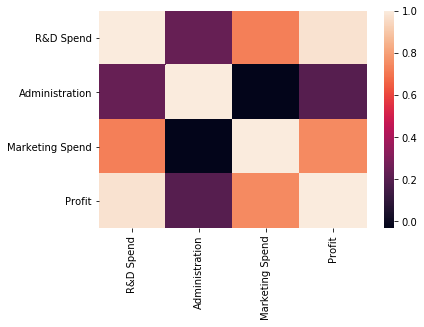

In [13]:
#data visualization
#building the correlation matrix
sns.heatmap(dataset.corr())

In [6]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()
print(X[0])

[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 1.000000e+00 1.653492e+05 4.717841e+05]


In [5]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]#So what that line did is sliced the array, taking all rows (:) but keeping the second column (1)



In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
##test_size=0.2=20%As you can see from the code, we have split the dataset in a 80–20 ratio, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
##train_test_split splits arrays or matrices into random train and test subsets. That means that everytime you run it without specifying random_state, you will get a different result, this is expected behavior.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [10]:
y_pred

array([101460.77961116, 133839.86467127, 133382.79400199,  73057.62254279,
       179902.30084643, 115432.49236602,  69005.66381157,  97851.17788444,
       113964.09645604, 169587.2339012 ])

In [23]:
#calculating the coefficients
print(regressor.coef_)

[ 2.34882260e+03 -1.16014460e+04  4.58722070e-07 -1.52046240e+03
  1.87024540e-07  6.53717497e+03  3.64445441e-07 -1.26701548e-06
  1.60216883e+03 -3.56456793e+03 -5.71250434e+03  7.39419193e-09
  3.45868986e+02 -2.03768200e+02 -3.74849563e+03 -3.67965185e-07
  2.15744821e+03 -3.35775065e+03  2.57731289e+03 -7.18015121e+03
 -3.31680818e+04  3.48859361e+03  9.69611479e+03  1.04556715e+04
 -1.57371201e+04  5.45696821e-12  1.72269485e+04  1.58049835e+04
  1.38251951e+04  9.52922474e+03  0.00000000e+00 -2.54788911e+02
 -3.76145082e+03  7.18574930e+03 -4.16537989e+02  5.62693987e+03
 -3.55180599e+03 -5.38402066e+03 -3.12868045e+03 -2.48638779e+02
  1.44172144e+02  2.74613122e+03  0.00000000e+00 -9.96746234e+02
  8.05238793e+03 -7.24513906e+03  5.01789891e+02 -1.58666822e+04
  6.79614074e+03  0.00000000e+00 -7.35478138e+02  5.27940807e+02
  7.85415252e-01  3.38321338e-02]


In [24]:
#calculating the intercept
print(regressor.intercept_)

46321.18082380179


In [28]:
#calculating the r squared Value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)#y_test is the given values y_pred is prdicting model

0.9449726033934106

We successfully trained our model with certain predictors and estimate the profit of the companies using linear regression

# backward elimination

In [17]:
#Building optimal model using Backward elimination
import statsmodels.formula.api as sm
X=np.append(arr=np.ones((50,1)).astype(int),values=X,axis=1)
X_opt=X[:, [0,1,2,3,4,5]]

In [18]:
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.298
Date:                Thu, 22 Aug 2019   Prob (F-statistic):              0.282
Time:                        18:14:26   Log-Likelihood:                -597.21
No. Observations:                  50   AIC:                             1206.
Df Residuals:                      44   BIC:                             1218.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.163e+05   5919.103     19.654      0.000    1.04e+05    1.28e+05
x1         -2.638e+04   4.01e+04     -0.657      0.514   -1.07e+05    5.45e+04
x2         -8.066e+04   4.01e+04     -2.009      0.051   -1.62e+05     248.165
x3          -3.51e+04   4.01e+04     -0.874      0.387   -1.16e+05    4.58e+04
x4         -3.533e+04   4.01e+04     -0.880      0.384   -1.16e+05    4.56e+04
x5         -3.853e+04   4.01e+04     -0.960      0.342   -1.19e+05    4.24e+04
==============================================================================
Omnibus:                        0.872   Durbin-Watson:                   0.322
Prob(Omnibus):                  0.647   Jarque-Bera (JB):                0.283
Skew:                          -0.107   Prob(JB):                        0.868
Kurtosis:                       3.300   Cond. No.                         7.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
X_opt=X[:, [0,1,2,4,5]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.439
Date:                Thu, 22 Aug 2019   Prob (F-statistic):              0.237
Time:                        18:14:44   Log-Likelihood:                -597.65
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      45   BIC:                             1215.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.156e+05   5839.079     19.792      0.000    1.04e+05    1.27e+05
x1         -2.562e+04      4e+04     -0.640      0.525   -1.06e+05     5.5e+04
x2          -7.99e+04      4e+04     -1.996      0.052   -1.61e+05     729.722
x3         -3.456e+04      4e+04     -0.863      0.392   -1.15e+05    4.61e+04
x4         -3.777e+04      4e+04     -0.944      0.350   -1.18e+05    4.29e+04
==============================================================================
Omnibus:                        0.561   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.110
Skew:                          -0.060   Prob(JB):                        0.947
Kurtosis:                       3.196   Cond. No.                         7.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
X_opt=X[:, [0,1,4,5]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.5550
Date:                Thu, 22 Aug 2019   Prob (F-statistic):              0.647
Time:                        18:14:57   Log-Likelihood:                -599.77
No. Observations:                  50   AIC:                             1208.
Df Residuals:                      46   BIC:                             1215.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.139e+05   5961.017     19.102      0.000    1.02e+05    1.26e+05
x1         -2.392e+04   4.13e+04     -0.579      0.565   -1.07e+05    5.92e+04
x2         -3.286e+04   4.13e+04     -0.796      0.430   -1.16e+05    5.03e+04
x3         -3.607e+04   4.13e+04     -0.873      0.387   -1.19e+05    4.71e+04
==============================================================================
Omnibus:                        0.286   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.070
Skew:                          -0.092   Prob(JB):                        0.965
Kurtosis:                       3.015   Cond. No.                         7.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
X_opt=X[:, [0,1,4]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.4534
Date:                Thu, 22 Aug 2019   Prob (F-statistic):              0.638
Time:                        18:15:10   Log-Likelihood:                -600.18
No. Observations:                  50   AIC:                             1206.
Df Residuals:                      47   BIC:                             1212.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.131e+05   5883.695     19.226      0.000    1.01e+05    1.25e+05
x1         -2.317e+04   4.12e+04     -0.563      0.576   -1.06e+05    5.97e+04
x2         -3.211e+04   4.12e+04     -0.780      0.439   -1.15e+05    5.07e+04
==============================================================================
Omnibus:                        0.111   Durbin-Watson:                   0.067
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.030
Skew:                          -0.048   Prob(JB):                        0.985
Kurtosis:                       2.926   Cond. No.                         7.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""